In [9]:
from planet_img_utils import *
from model_train_utils import *
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

In [10]:
path2data = '/home/akansh-i2sc/Desktop/Project/detect-car-LR/data/data_parking_masked/'
os.listdir(path2data)

paths = []
for i in os.listdir(path2data):
    for j in os.listdir(path2data+i):
        img_path = path2data+i+'/'+j+'/**/*.tif'
        paths.append(img_path)

In [11]:
len(paths)

30

- Do the experiment for each path to find the parking lots that are actually useful

In [12]:
#path_1
clean_1 = clean_data_by_size(paths[0])
clean_2 = clean_data_by_black_pixels(clean_1)
clean_3 = clean_data_by_white_pixels(clean_2)

Initial size of dataset 500
Most common size of the dataset (4, 59, 45)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removing faulty black pixels in images) 250
Final size of dataset(after removing faulty white pixels in images) 237


In [11]:
masked_clean = [i for i in clean_3 if 'Masked' in i]
square_clean = [i for i in clean_3 if 'Planet' in i]
print(len(masked_clean), len(square_clean))

0 237


- 0 masked image in the path: 
- /home/akansh-i2sc/Desktop/Project/detect-car-LR/data/data_parking_masked/Saarbrucken_Park/parking_lot_323_bbox/**/*.tif

In [4]:
#path_2
clean_1 = clean_data_by_size(paths[1])
clean_2 = clean_data_by_black_pixels(clean_1)
clean_3 = clean_data_by_white_pixels(clean_2)

masked_clean = [i for i in clean_3 if 'Masked' in i]
square_clean = [i for i in clean_3 if 'Planet' in i]
print(len(masked_clean), len(square_clean))
print(paths[1])

Initial size of dataset 500
Most common size of the dataset (4, 148, 167)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removing faulty black pixels in images) 476
Final size of dataset(after removing faulty white pixels in images) 438
222 216
/home/akansh-i2sc/Desktop/Project/detect-car-LR/data/data_parking_masked/Saarbrucken_Park/parking_lot_276_bbox/**/*.tif


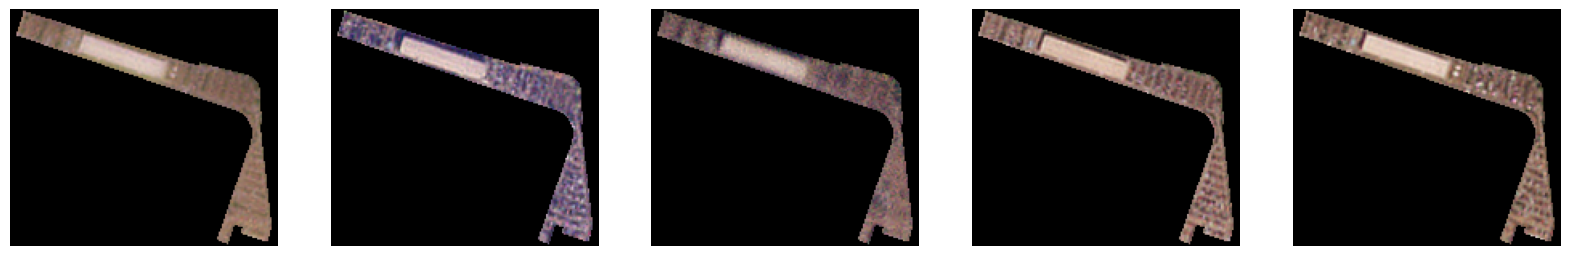

In [13]:
#plot random images from make_clean
plt.figure(figsize=(20,20))
for i in range(5):
    img = rioxarray.open_rasterio(masked_clean[np.random.randint(0,len(masked_clean))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')

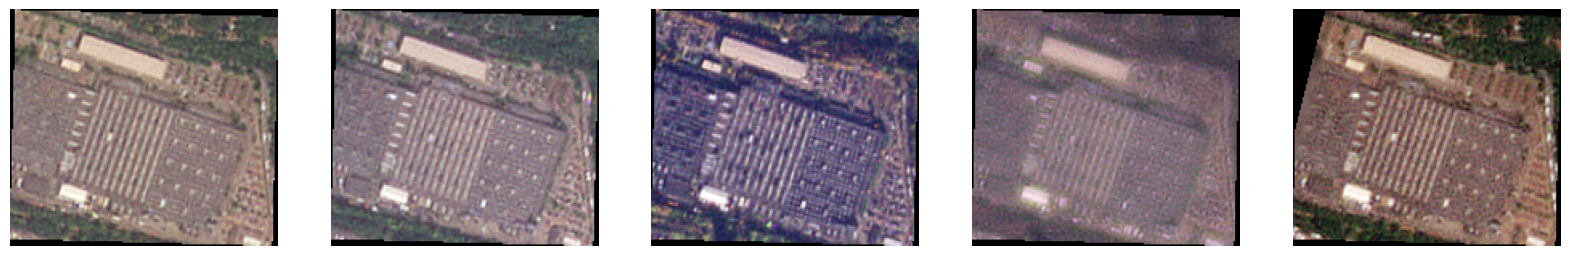

In [14]:
plt.figure(figsize=(20,20))
for i in range(5):
    img = rioxarray.open_rasterio(square_clean[np.random.randint(0,len(square_clean))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')

In [5]:
df_masked = label_csv(masked_clean)
df_square = label_csv(square_clean)

Class distribution in dataset: 0    198
1     24
Name: label, dtype: int64
Class distribution in dataset: 0    191
1     25
Name: label, dtype: int64


- TODO: Plot image with labels

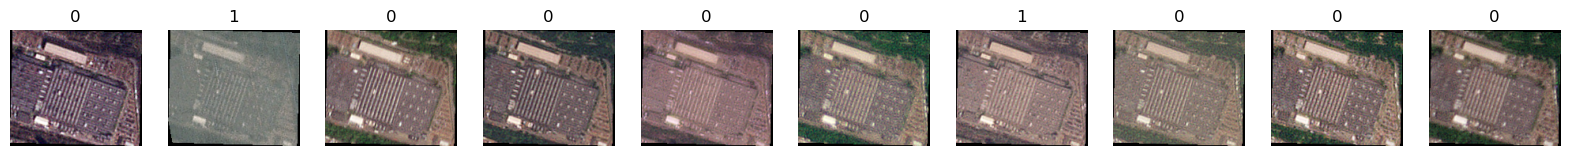

In [8]:
# plot random 10 images from df_square with labels
plt.figure(figsize=(20,20))
for i in range(10):
    img = rioxarray.open_rasterio(df_square['image_path'][np.random.randint(0,len(df_square))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df_square['label'][np.random.randint(0,len(df_square))])

In [ ]:
model_mask, train_loss_msk, train_accuracy_msk, train_auc_msk, test_loss_msk, test_accuracy_msk, test_auc_msk = train(df_masked, train_transform, test_transform, test_size = 0.1, num_epochs = 100, save_path= None, batch_size = 32)

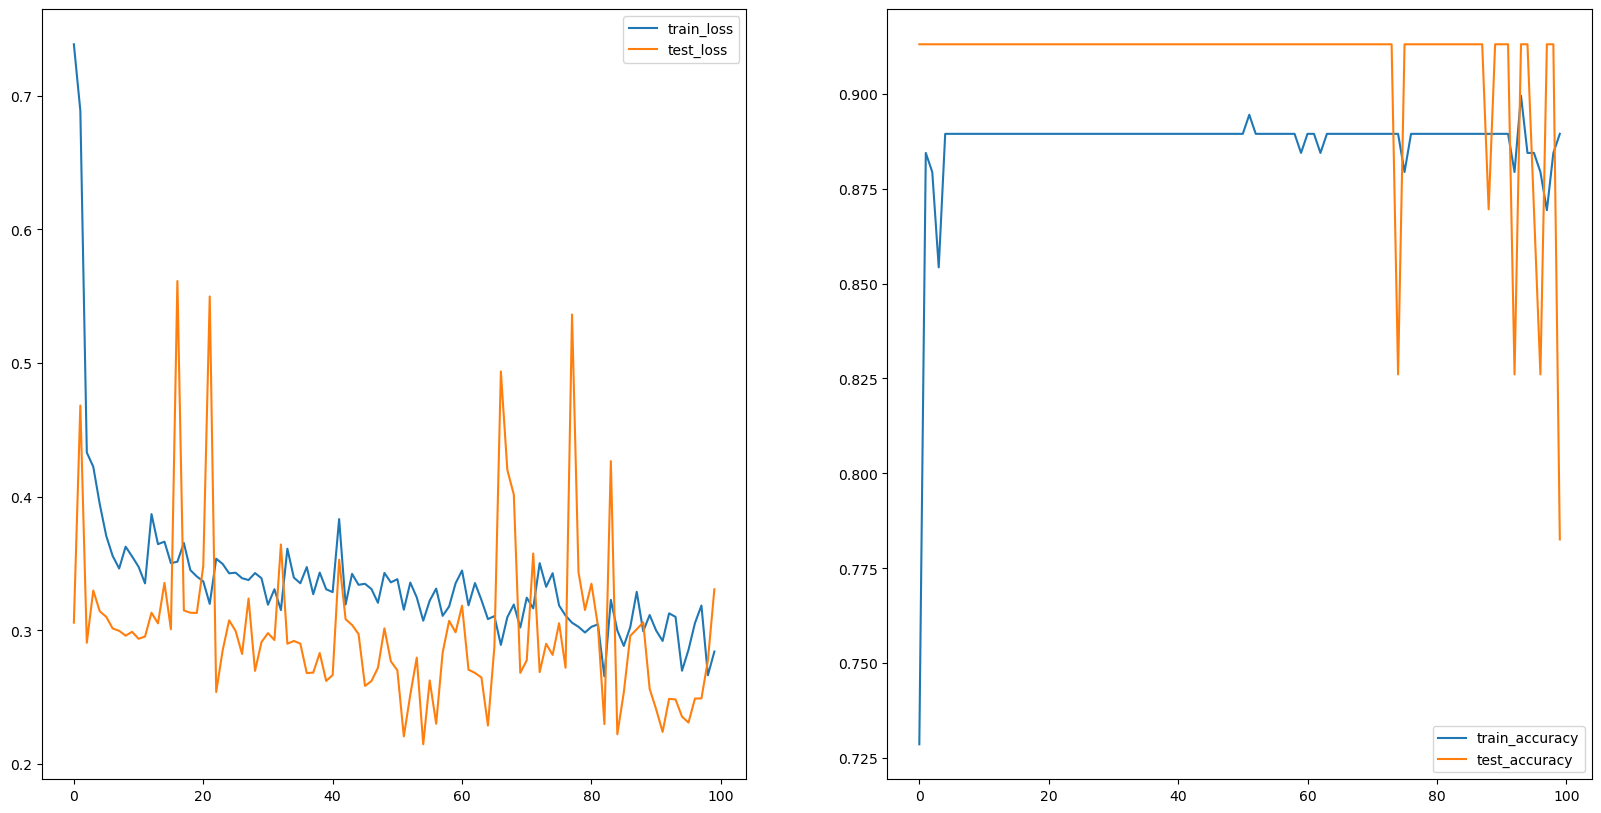

In [8]:
#plot loss and accuracy
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(train_loss_msk, label = 'train_loss')
plt.plot(test_loss_msk, label = 'test_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accuracy_msk, label = 'train_accuracy')
plt.plot(test_accuracy_msk, label = 'test_accuracy')
plt.legend()


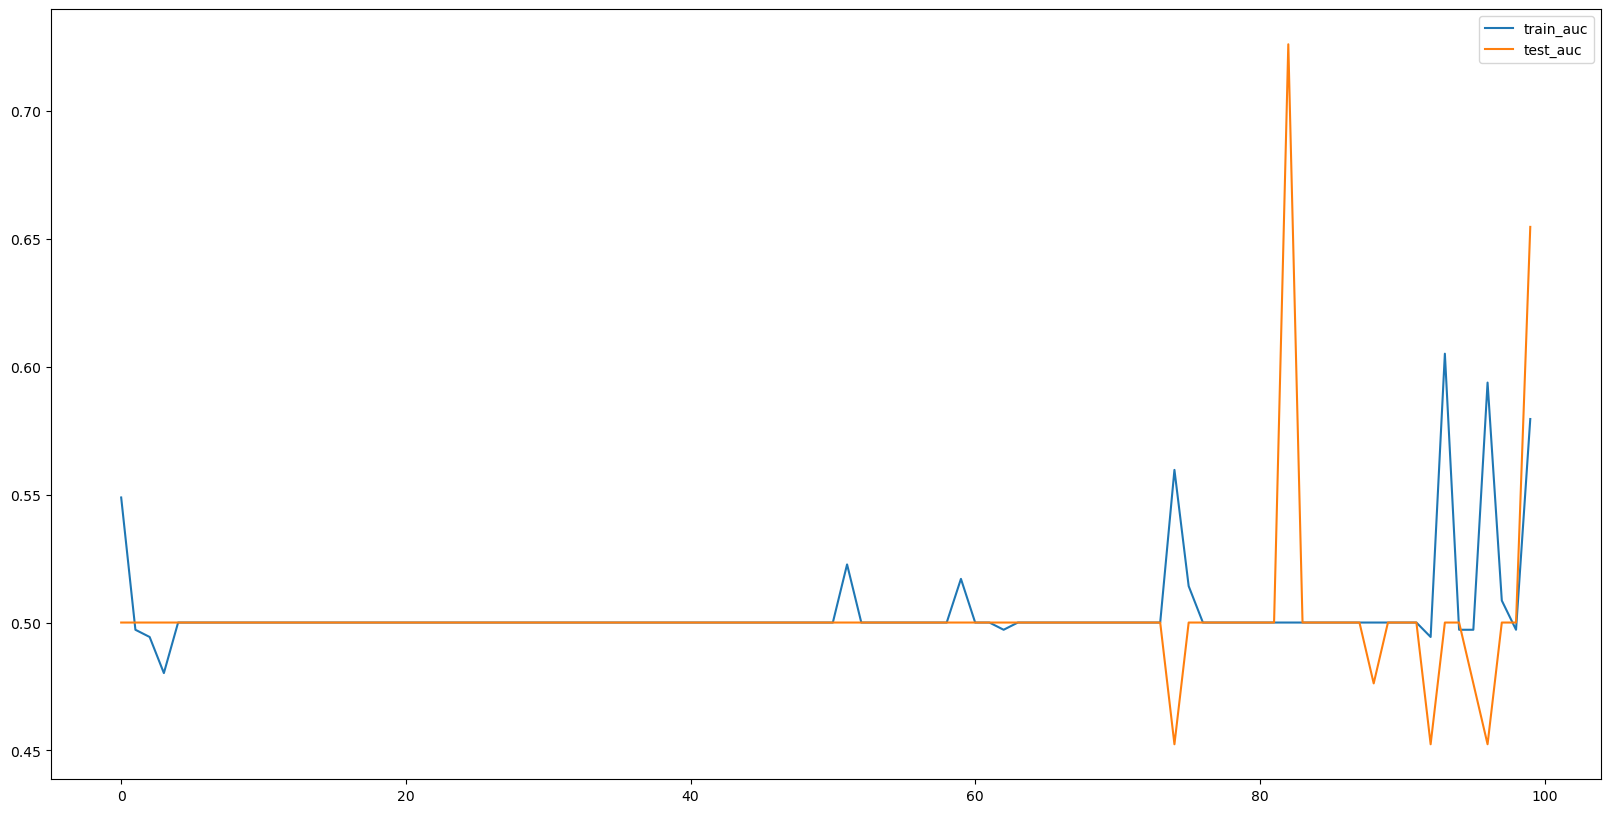

In [9]:
#plot train and test auc
plt.figure(figsize=(20,10))
plt.plot(train_auc_msk, label = 'train_auc')
plt.plot(test_auc_msk, label = 'test_auc')
plt.legend()


In [ ]:
#square images model
model_square, train_loss_sq, train_accuracy_sq, train_auc_sq, test_loss_sq, test_accuracy_sq, test_auc_sq = train(df_square, train_transform, test_transform, test_size = 0.1, num_epochs = 100, save_path= None, batch_size = 32)

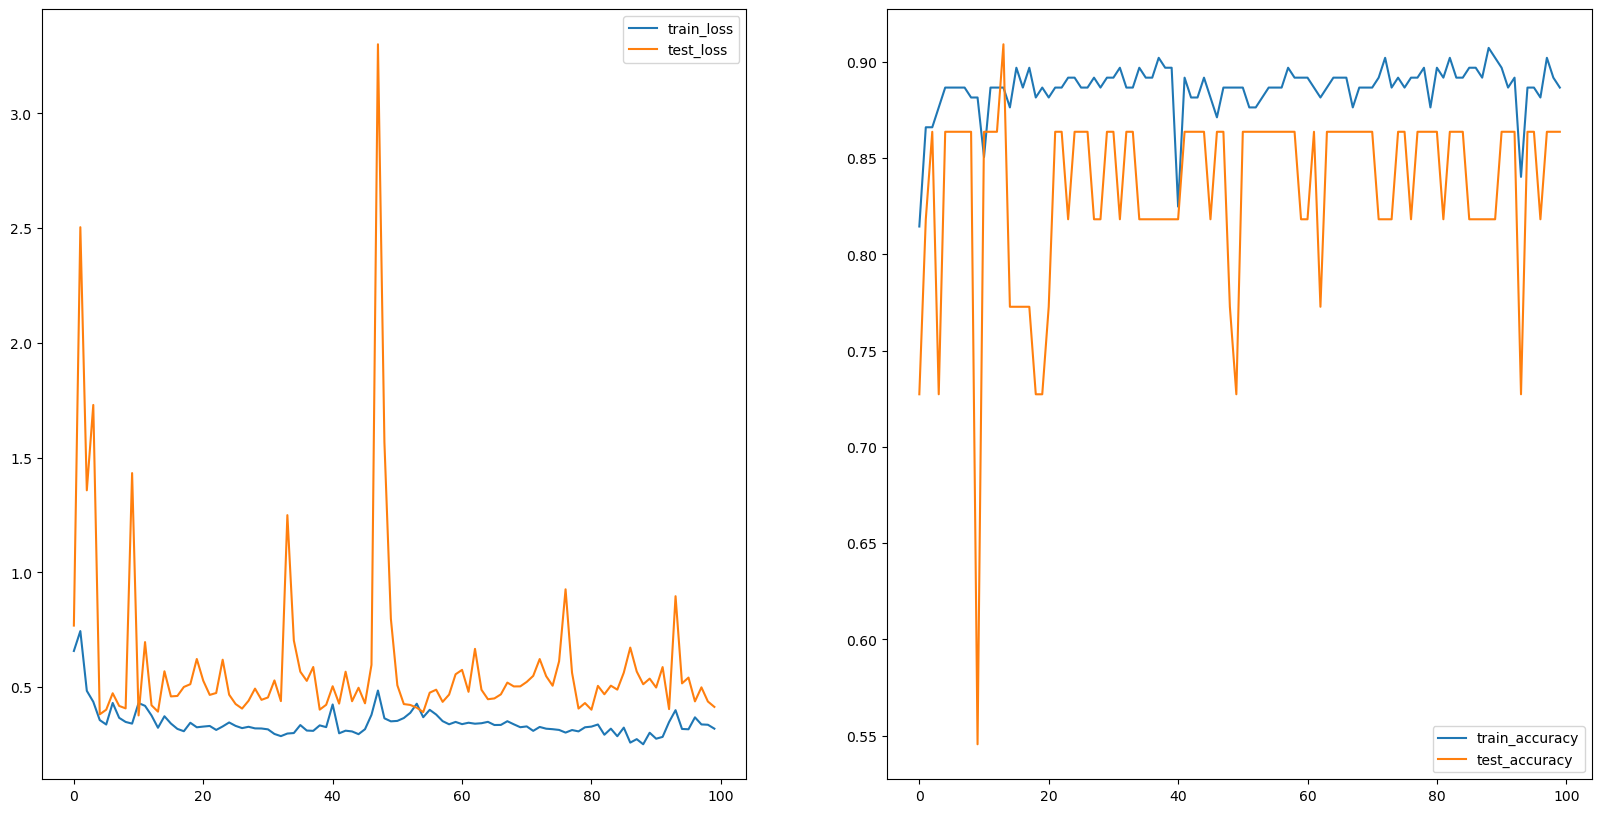

In [ ]:
#plot loss and accuracy
# plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(train_loss_sq, label = 'train_loss')
plt.plot(test_loss_sq, label = 'test_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accuracy_sq, label = 'train_accuracy')
plt.plot(test_accuracy_sq, label = 'test_accuracy')
plt.legend()

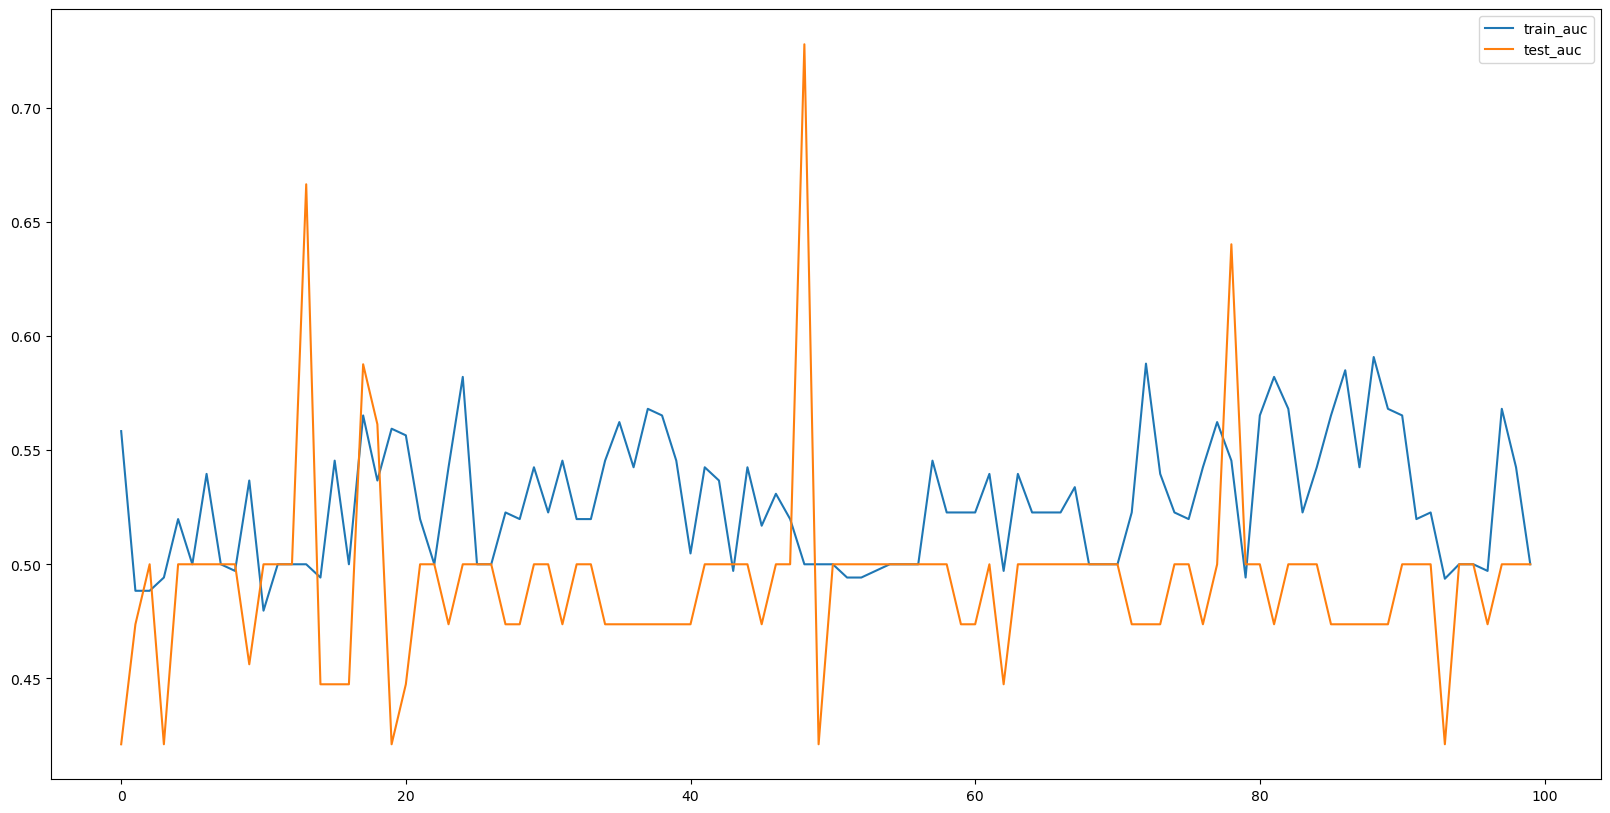

In [12]:
#plot train and test auc
plt.figure(figsize=(20,10))
plt.plot(train_auc_sq, label = 'train_auc')
plt.plot(test_auc_sq, label = 'test_auc')
plt.legend()


#path 3

In [13]:
clean_1 = clean_data_by_size(paths[2])
clean_2 = clean_data_by_black_pixels(clean_1)
clean_3 = clean_data_by_white_pixels(clean_2)

masked_clean = [i for i in clean_3 if 'Masked' in i]
square_clean = [i for i in clean_3 if 'Planet' in i]
print(len(masked_clean), len(square_clean))
print(paths[2])

df_masked = label_csv(masked_clean)
df_square = label_csv(square_clean)

Initial size of dataset 500
Most common size of the dataset (4, 73, 49)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removing faulty black pixels in images) 495
Final size of dataset(after removing faulty white pixels in images) 466
235 231
/home/akansh-i2sc/Desktop/Project/detect-car-LR/data/data_parking_masked/Saarbrucken_Park/parking_lot_49_bbox/**/*.tif
Class distribution in dataset: 0    205
1     30
Name: label, dtype: int64
Class distribution in dataset: 0    201
1     30
Name: label, dtype: int64


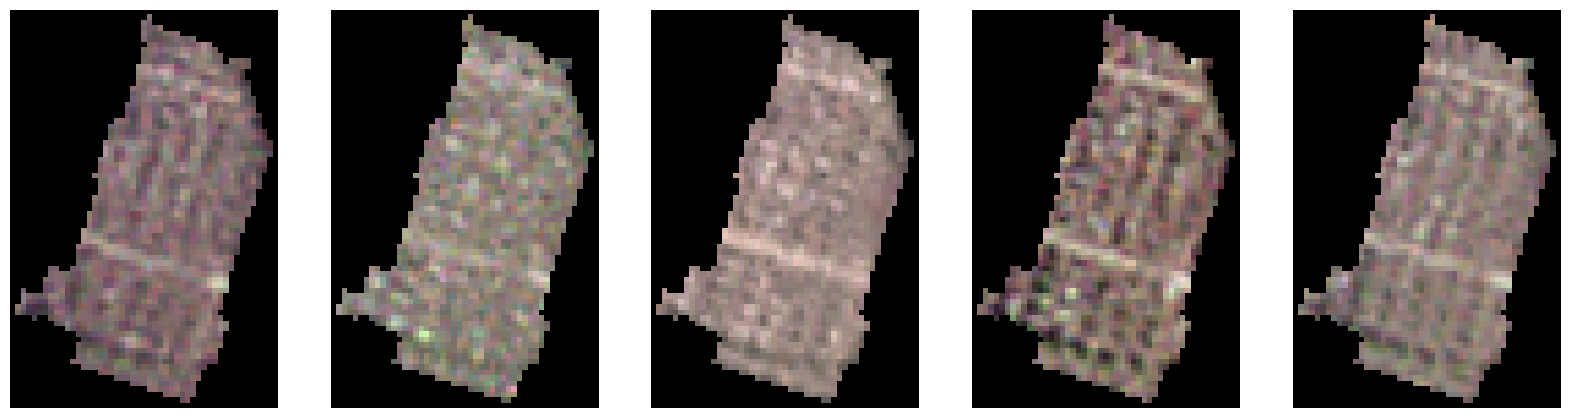

In [16]:
plt.figure(figsize=(20,20))
for i in range(5):
    img = rioxarray.open_rasterio(masked_clean[np.random.randint(0,len(masked_clean))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')

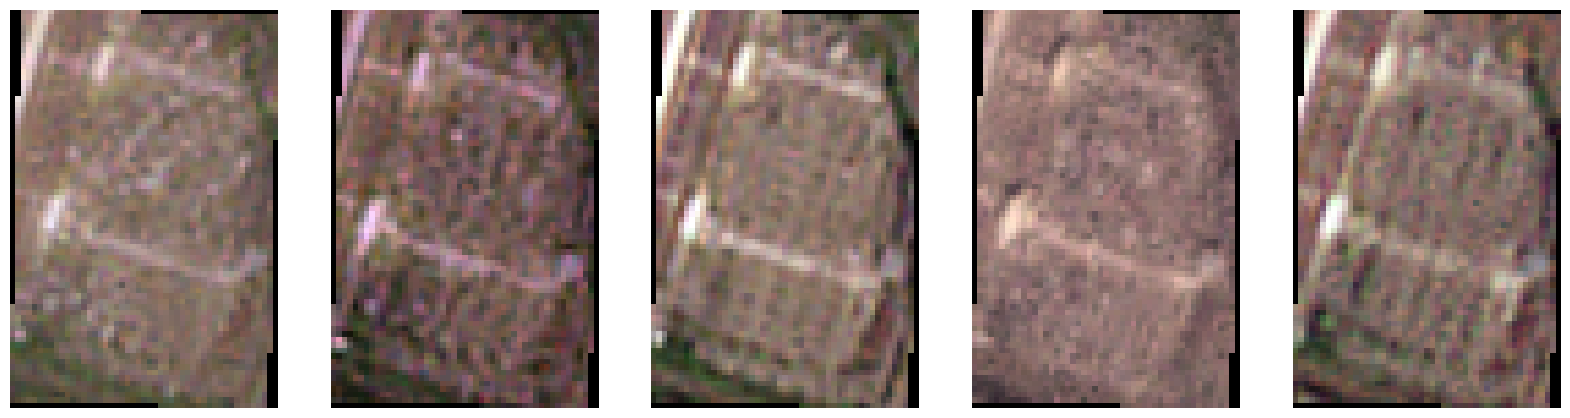

In [17]:
plt.figure(figsize=(20,20))
for i in range(5):
    img = rioxarray.open_rasterio(square_clean[np.random.randint(0,len(square_clean))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')

In [ ]:
masked_clean = [i for i in clean_3 if 'Masked' in i]
square_clean = [i for i in clean_3 if 'Planet' in i]
print(len(masked_clean), len(square_clean))
model_mask, train_loss_msk, train_accuracy_msk, train_auc_msk, test_loss_msk, test_accuracy_msk, test_auc_msk = train(df_masked, train_transform, test_transform, test_size = 0.1, num_epochs = 50, save_path= None, batch_size = 64)
model_square, train_loss_sq, train_accuracy_sq, train_auc_sq, test_loss_sq, test_accuracy_sq, test_auc_sq = train(df_square, train_transform, test_transform, test_size = 0.1, num_epochs = 50, save_path= None, batch_size = 64)

Text(0.5, 1.0, 'Square Images')

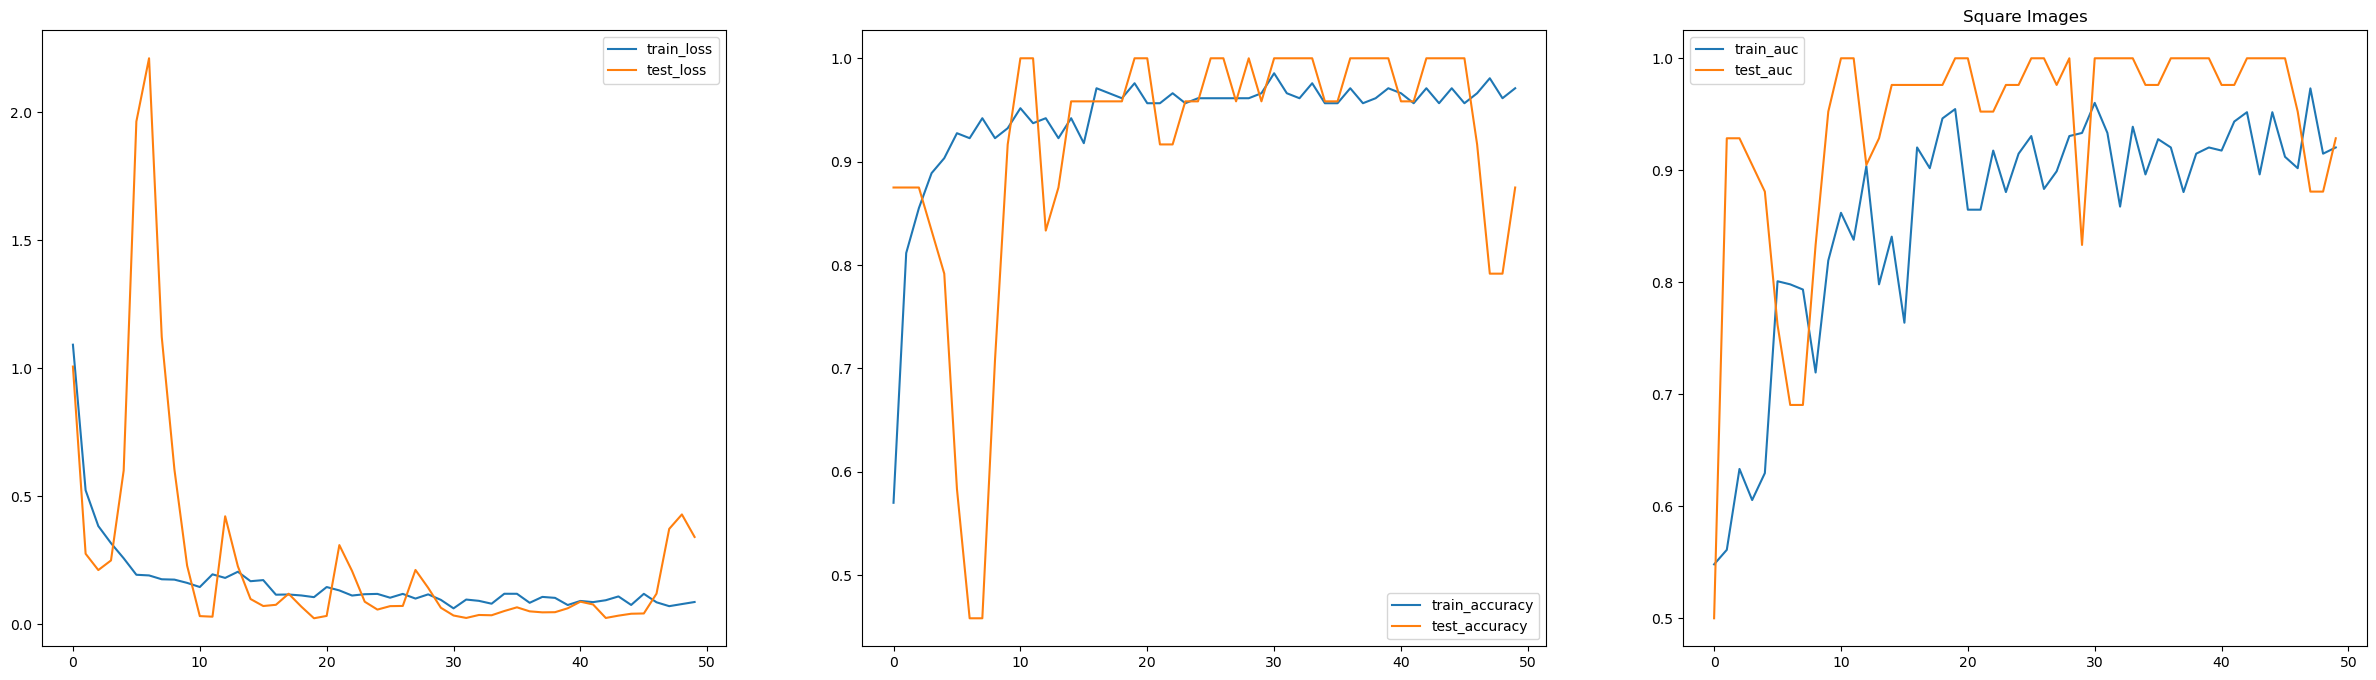

In [19]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.plot(train_loss_sq, label = 'train_loss')
plt.plot(test_loss_sq, label = 'test_loss')
plt.legend()
plt.subplot(1,3,2)
plt.plot(train_accuracy_sq, label = 'train_accuracy')
plt.plot(test_accuracy_sq, label = 'test_accuracy')
plt.legend()
plt.subplot(1,3,3)
plt.plot(train_auc_sq, label = 'train_auc')
plt.plot(test_auc_sq, label = 'test_auc')
plt.legend()
plt.title('Square Images')


Text(0.5, 1.0, 'Masked Images')

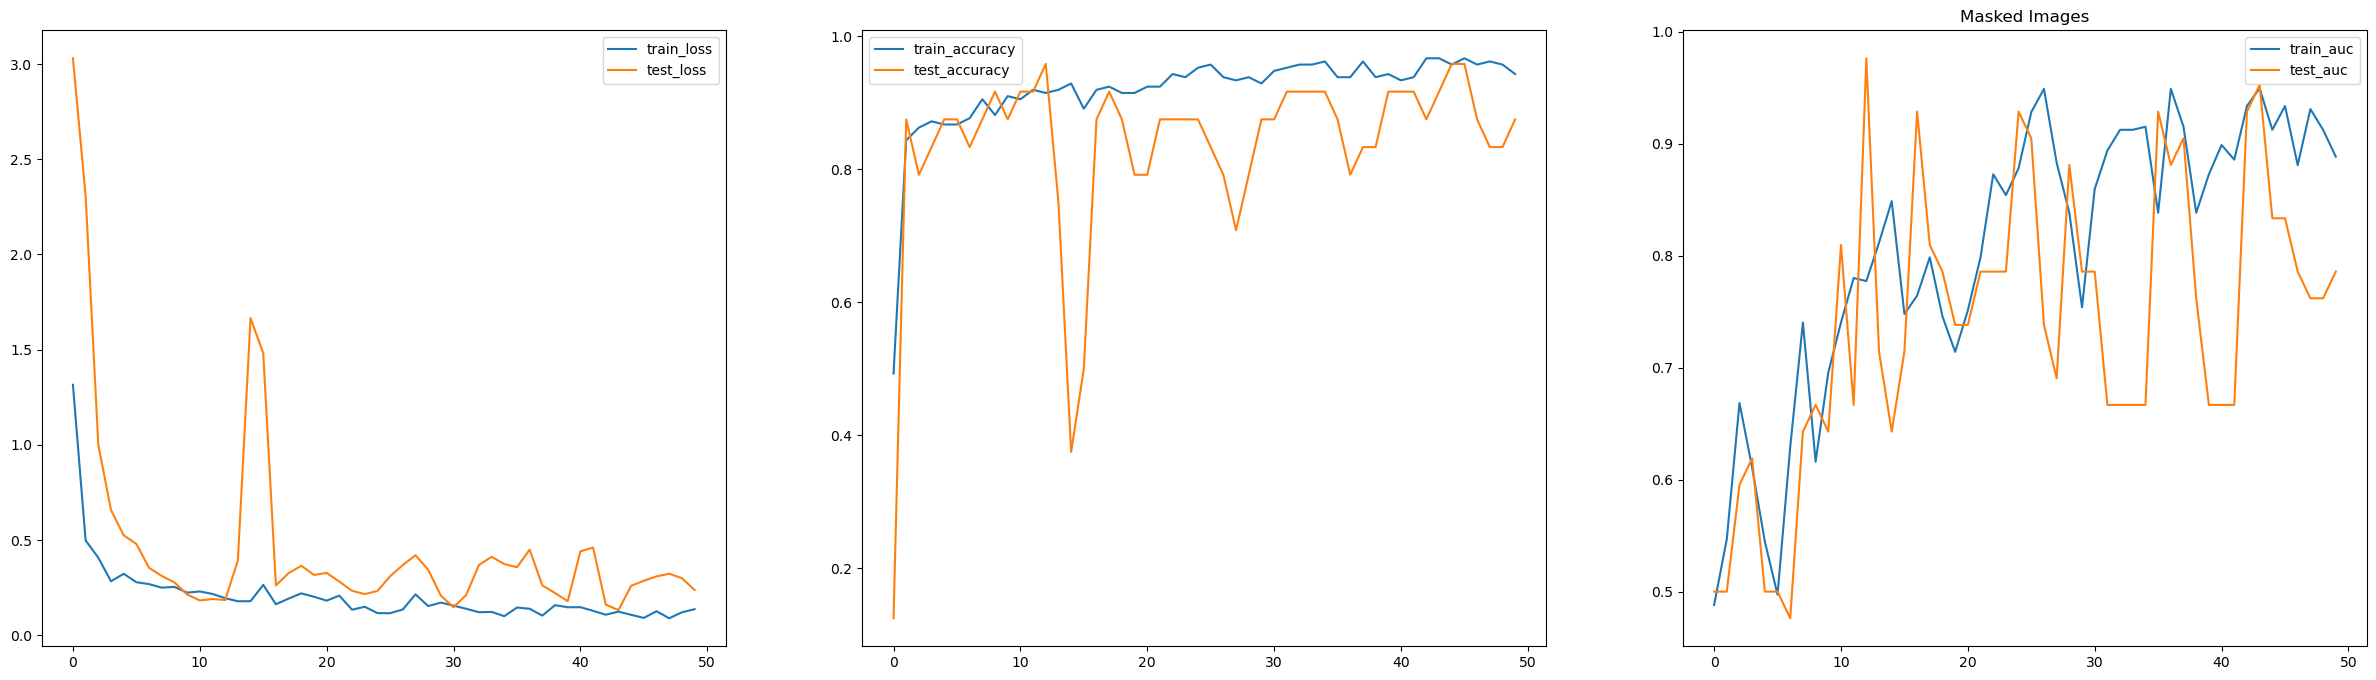

In [20]:
#mask images plot
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.plot(train_loss_msk, label = 'train_loss')
plt.plot(test_loss_msk, label = 'test_loss')
plt.legend()
plt.subplot(1,3,2)
plt.plot(train_accuracy_msk, label = 'train_accuracy')
plt.plot(test_accuracy_msk, label = 'test_accuracy')
plt.legend()
plt.subplot(1,3,3)
plt.plot(train_auc_msk, label = 'train_auc')
plt.plot(test_auc_msk, label = 'test_auc')
plt.legend()
plt.title('Masked Images')


#### GradCAM

Predicted label: 0
Day: Wednesday
True label: 0


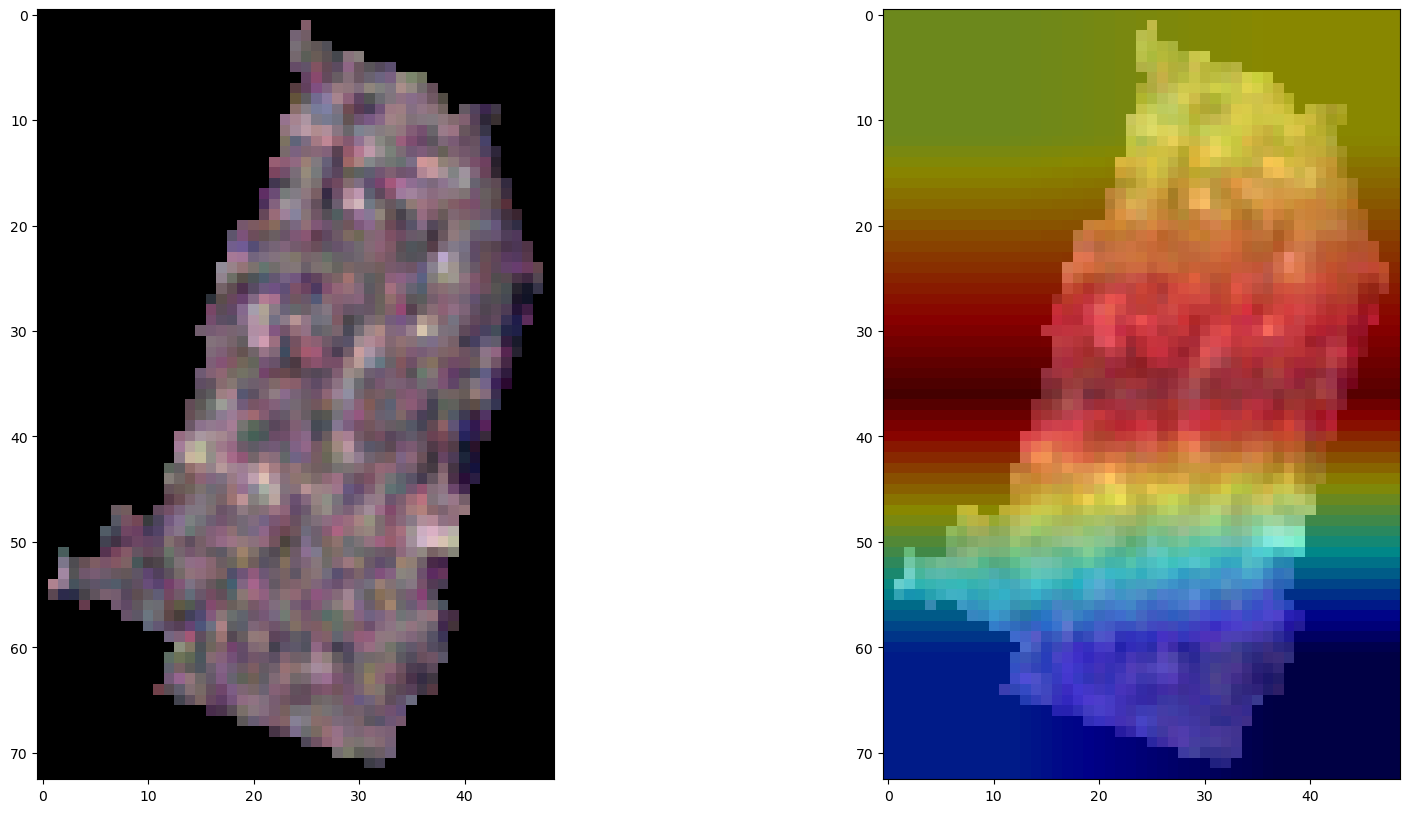

In [22]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

_, _ = plot_gcam(model_mask, masked_clean[45], test_transform, mean, std, plot = True)


Predicted label: 0
Day: Wednesday
True label: 0


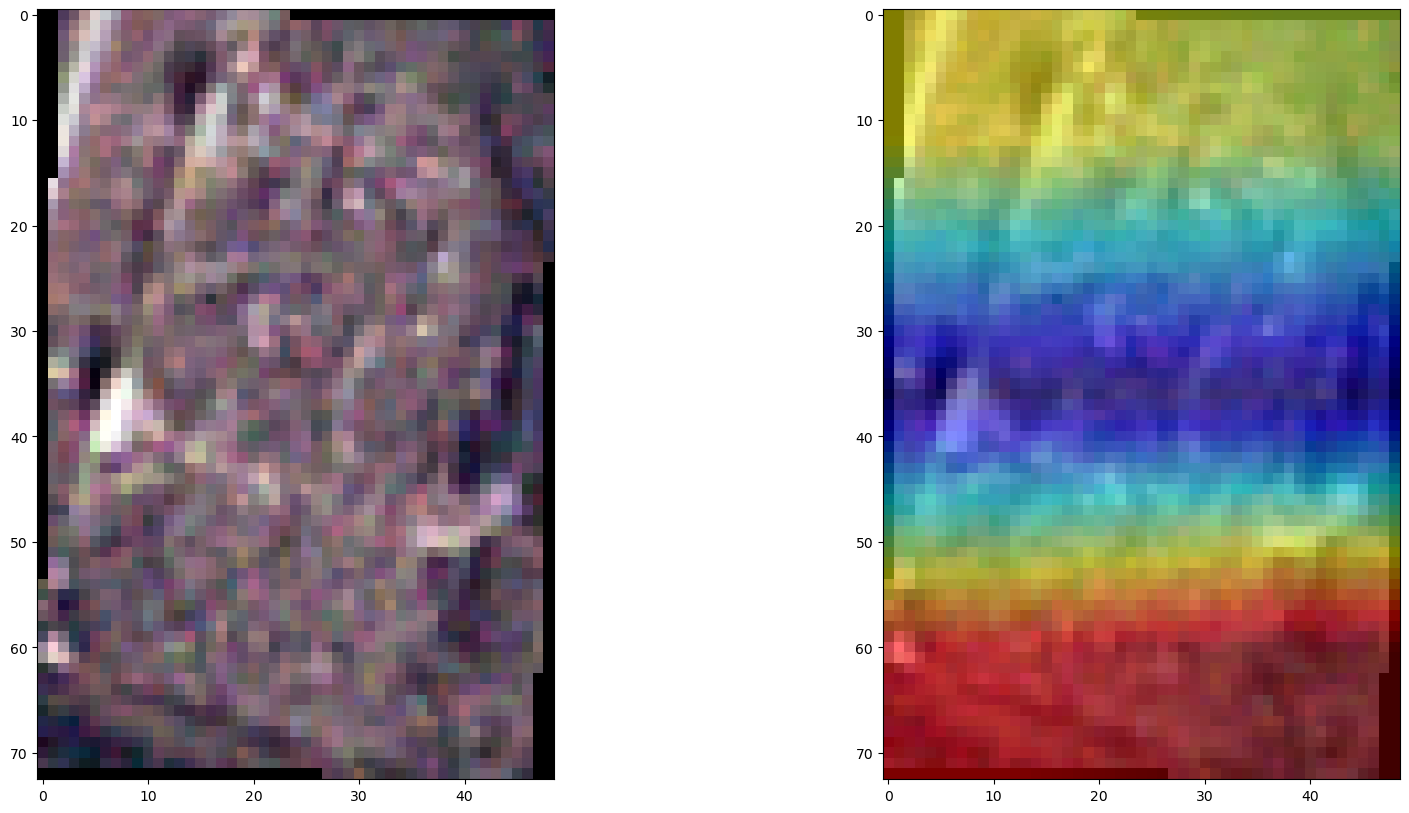

In [23]:
_, _ = plot_gcam(model_square, square_clean[45], test_transform, mean, std, plot = True)


#### Path 4

In [24]:
clean_1 = clean_data_by_size(paths[3])
clean_2 = clean_data_by_black_pixels(clean_1)
clean_3 = clean_data_by_white_pixels(clean_2)

masked_clean = [i for i in clean_3 if 'Masked' in i]
square_clean = [i for i in clean_3 if 'Planet' in i]
print(len(masked_clean), len(square_clean))
print(paths[3])

df_masked = label_csv(masked_clean)
df_square = label_csv(square_clean)

Initial size of dataset 500
Most common size of the dataset (4, 52, 58)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removing faulty black pixels in images) 492
Final size of dataset(after removing faulty white pixels in images) 295
232 63
/home/akansh-i2sc/Desktop/Project/detect-car-LR/data/data_parking_masked/Saarbrucken_Park/parking_lot_1015_bbox/**/*.tif
Class distribution in dataset: 0    202
1     30
Name: label, dtype: int64
Class distribution in dataset: 0    55
1     8
Name: label, dtype: int64


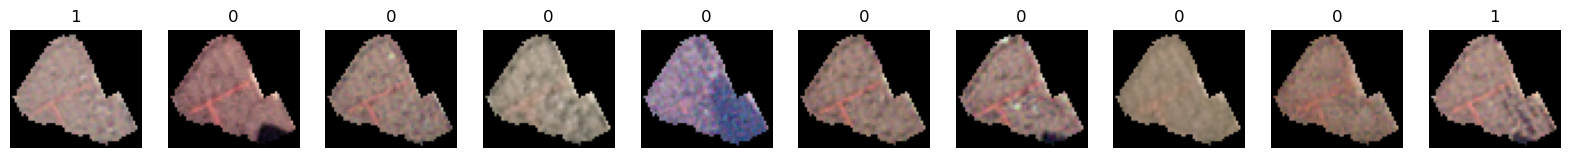

In [28]:
plt.figure(figsize=(20,20))
for i in range(10):
    img = rioxarray.open_rasterio(df_masked['image_path'][np.random.randint(0,len(df_masked))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df_masked['label'][np.random.randint(0,len(df_masked))])

In [ ]:
model_mask, train_loss_msk, train_accuracy_msk, train_auc_msk, test_loss_msk, test_accuracy_msk, test_auc_msk = train(df_masked, train_transform, test_transform, test_size = 0.1, num_epochs = 50, save_path= None, batch_size = 128)
# model_square, train_loss_sq, train_accuracy_sq, train_auc_sq, test_loss_sq, test_accuracy_sq, test_auc_sq = train(df_square, train_transform, test_transform, test_size = 0.1, num_epochs = 50, save_path= None, batch_size = 128)

Text(0.5, 1.0, 'Masked Images')

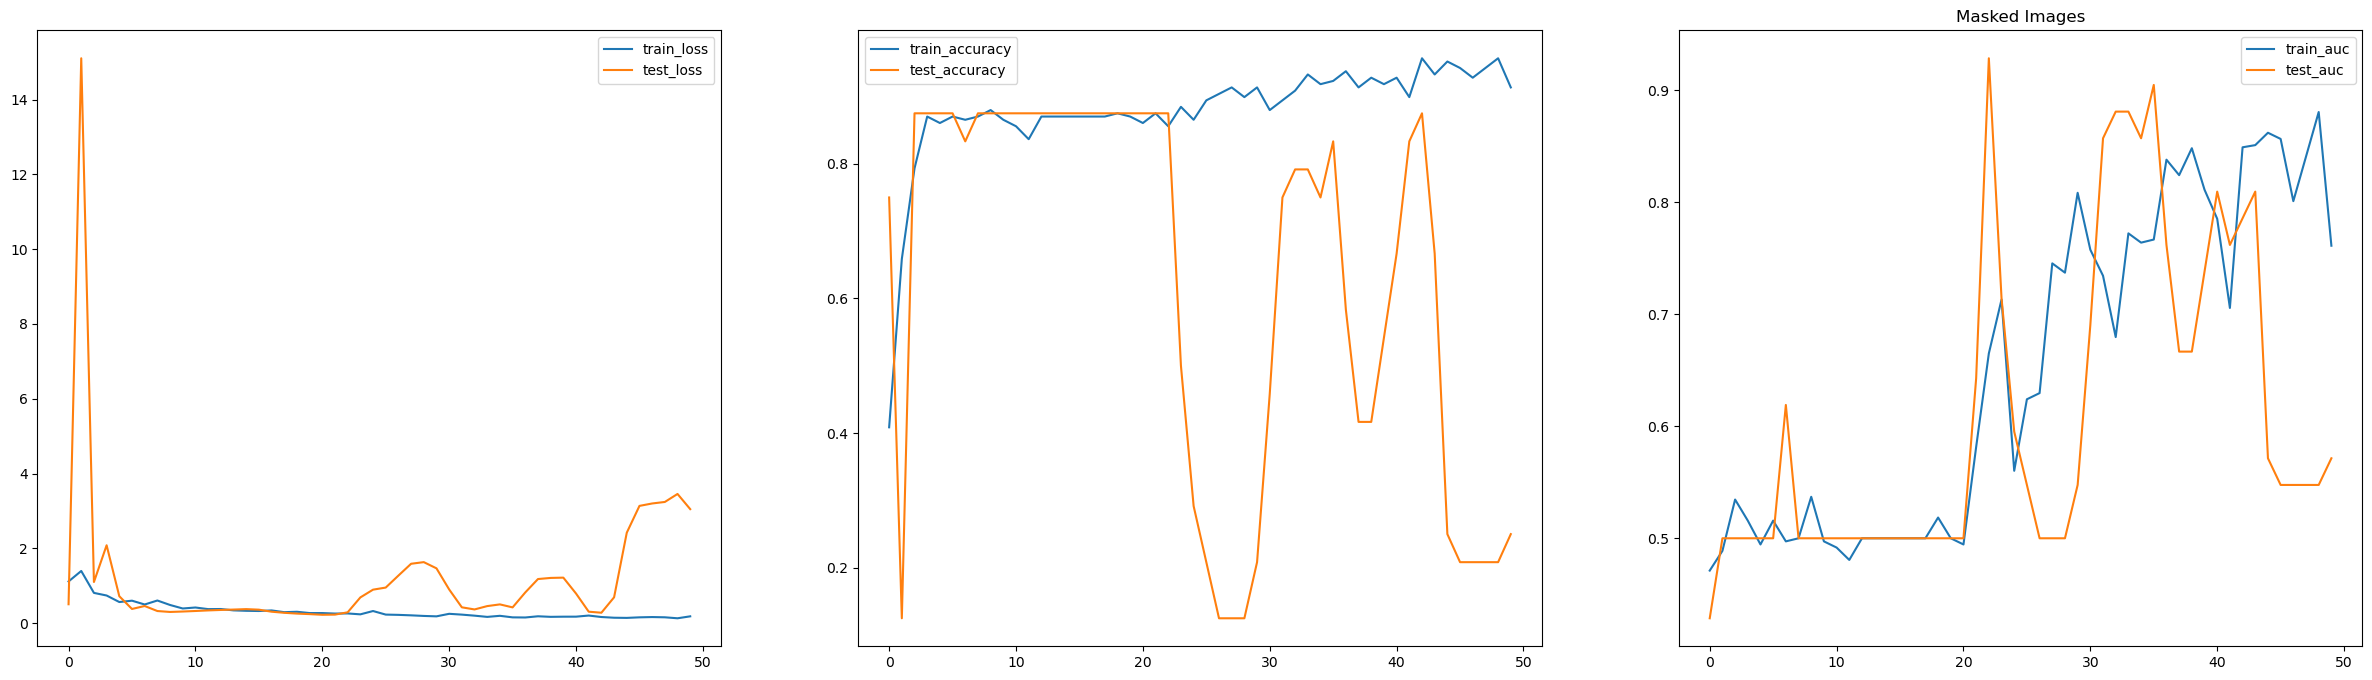

In [29]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.plot(train_loss_msk, label = 'train_loss')
plt.plot(test_loss_msk, label = 'test_loss')
plt.legend()
plt.subplot(1,3,2)
plt.plot(train_accuracy_msk, label = 'train_accuracy')
plt.plot(test_accuracy_msk, label = 'test_accuracy')
plt.legend()
plt.subplot(1,3,3)
plt.plot(train_auc_msk, label = 'train_auc')
plt.plot(test_auc_msk, label = 'test_auc')
plt.legend()
plt.title('Masked Images')

Predicted label: 1
Day: Sunday
True label: 1


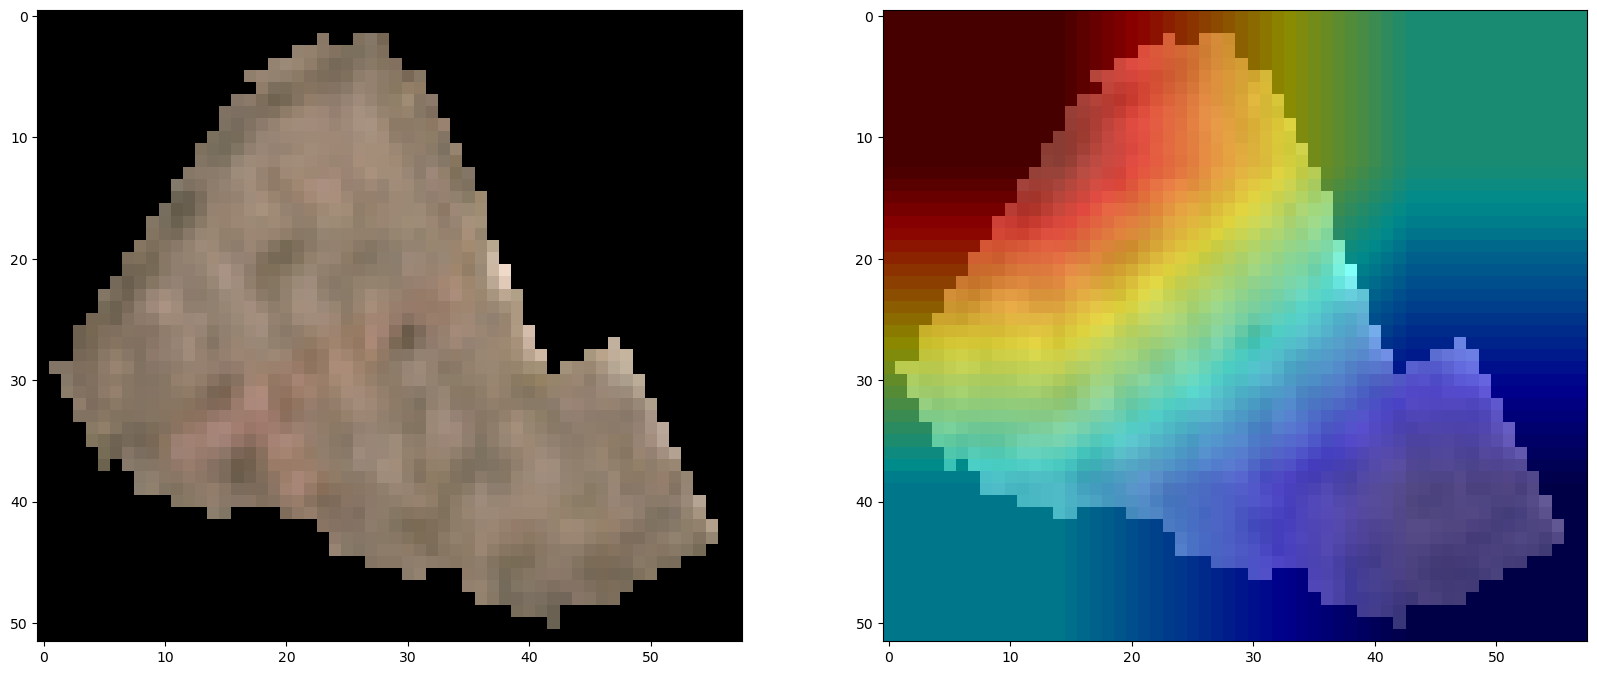

In [32]:
_, _ = plot_gcam(model_mask, masked_clean[41], test_transform, mean, std, plot = True)
